In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# T2 PvL WSG

In [109]:
data = pd.read_csv('T2_WSG_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=17)

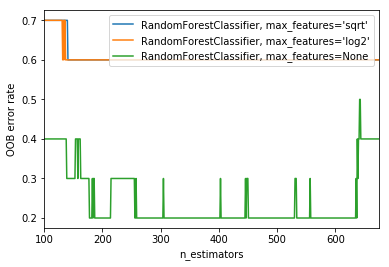

In [110]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [113]:
clf = RandomForestClassifier(n_estimators=350, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [119]:
clf_final = RandomForestClassifier(n_estimators=200, max_features=None, oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [120]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

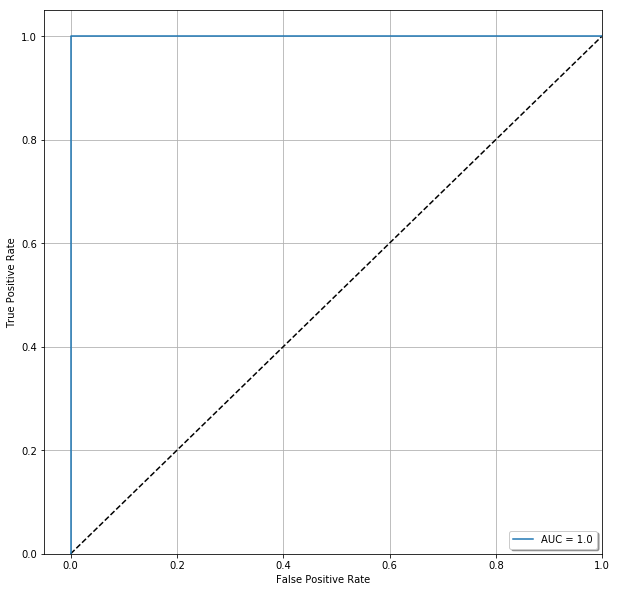

In [121]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [122]:
print(clf_final.oob_score_)

0.8


In [123]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['s_Lactobacillus_reuteri',
 's_Akkermansia_muciniphila',
 's_Lactobacillus_animalis',
 's_Lactobacillus_murinus',
 's_Borrelia_anserina',
 's_Entomoplasma_freundtii',
 's_Parabacteroides_goldsteinii',
 's_Lactobacillus_gasseri',
 's_Lactobacillus_acidophilus',
 's_Bifidobacterium_pseudolongum',
 's_Lactobacillus_johnsonii',
 's_Lactobacillus_amylolyticus',
 's_Agathobacter_ruminis',
 's_Paenibacillus_sp._IHB_B_3084',
 's_Chlamydia_caviae',
 's_Candidatus_Arthromitus_sp._SFB-mouse',
 's_Thermocrinis_minervae',
 's_Vibrio_sp._2521-89',
 's_Corynebacterium_uterequi',
 's_Pseudobutyrivibrio_ruminis']

In [125]:
for i in feats.values:
    print(i)

0.485
0.115
0.07
0.055
0.045
0.035
0.035
0.03
0.025
0.015
0.015
0.015
0.01
0.01
0.01
0.01
0.005
0.005
0.005
0.005


# T2 PvL BA

In [126]:
data = pd.read_csv('T2_BA_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=16)

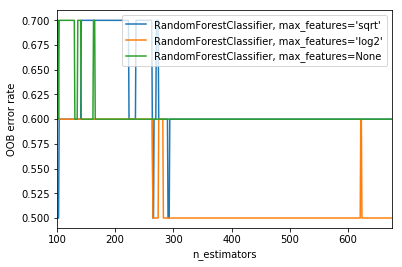

In [167]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [168]:
clf = RandomForestClassifier(n_estimators=400, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.4


In [179]:
clf_final = RandomForestClassifier(n_estimators=400, max_features='log2', oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.16666666666666666


In [180]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.0

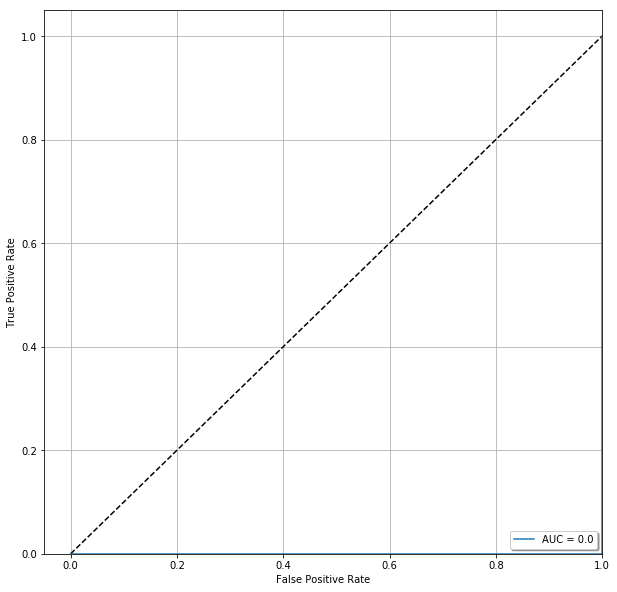

In [181]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [182]:
print(clf_final.oob_score_)

0.5


In [183]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['β-Hyodeoxycholic acid.7',
 'α-Hyodeoxycholic acid methyl ester .1',
 'α-Hyodeoxycholic acid methyl ester .7',
 'β-Hyodeoxycholic acid.13',
 'β-Hyodeoxycholic acid.14',
 'β-Hyodeoxycholic acid.17',
 'α-Hyodeoxycholic acid methyl ester ',
 'β-Hyodeoxycholic acid',
 'β-Hyodeoxycholic acid.10',
 'α-Hyodeoxycholic acid methyl ester .6',
 'β-Hyodeoxycholic acid.11',
 'β-Hyodeoxycholic acid.2',
 'β-Hyodeoxycholic acid.19',
 'α-Hyodeoxycholic acid methyl ester .5',
 'α-Hyodeoxycholic acid methyl ester .4',
 'α-Hyodeoxycholic acid methyl ester .3',
 'α-Hyodeoxycholic acid methyl ester .2',
 'β-Hyodeoxycholic acid.1',
 'β-Hyodeoxycholic acid.20',
 'β-Hyodeoxycholic acid.3']

In [184]:
for i in feats.values:
    print(i)

0.20172671249055177
0.18609565263605427
0.1365845293209877
0.08592971230158727
0.08493552059712776
0.061635830026455035
0.05203276998299318
0.038491898148148136
0.034836424083522305
0.034435664682539675
0.0317583667957924
0.02691907123960695
0.024617847694633398
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# T2 PvL Known

In [185]:
data = pd.read_csv('T2_Known_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=16)

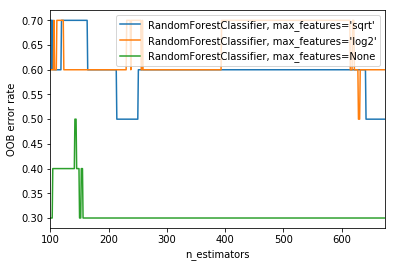

In [186]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [196]:
clf = RandomForestClassifier(n_estimators=200, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [198]:
clf_final = RandomForestClassifier(n_estimators=200, max_features='log2', oob_score=True, random_state=40)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8333333333333334


In [199]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8333333333333334

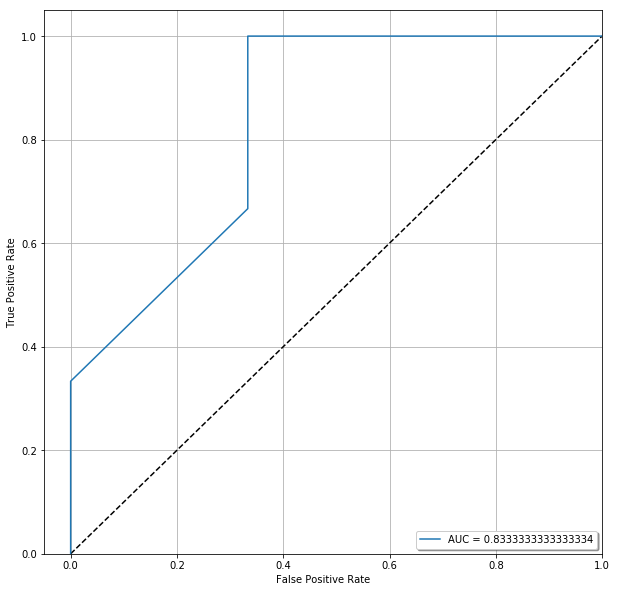

In [200]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [201]:
print(clf_final.oob_score_)

0.5


In [202]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['Oleanolic acid methyl ester',
 'Urobilin (NIST14)',
 'Phytomonic acid',
 'phosphocholine (NIST14)',
 '4-dihydroxyheptadec-16-en-2-yl acetate',
 'Oleic acid methyl ester',
 'Phenol',
 'Sumaresinolic acid',
 'Ricinoleic Acid methyl ester',
 '9(10)-EpOME (NIST14)',
 'Urobilin (NIST14).2',
 'Phytomonic acid.1',
 'Urobilin',
 'PC(O-16:1/0:0); [M+H]+ C24H51N1O6P1',
 'phosphoethanolamine (NIST14)',
 'Urobilin (NIST14).1',
 'phosphocholine (NIST14).2',
 'phosphocholine (NIST14).1',
 'phosphocholine (NIST14).3',
 'Oleanolic acid']

In [203]:
for i in feats.values:
    print(i)

0.18954052343159486
0.127380291005291
0.08340085978835977
0.0682862433862434
0.05843562925170067
0.05815661375661376
0.05453513794406652
0.05322238756613757
0.053144113756613764
0.050156901927437644
0.04099768518518518
0.03967375283446713
0.028109259259259264
0.02707738095238095
0.022473970143613006
0.01965184240362812
0.012348015873015872
0.008409391534391535
0.0
0.0


# T2 LvCoL WSG

In [333]:
data = pd.read_csv('T2_WSG_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=17)

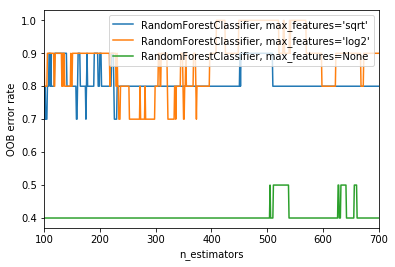

In [322]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 700

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [334]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.4


In [335]:
clf_final = RandomForestClassifier(n_estimators=100, max_features=None, oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [336]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6666666666666667

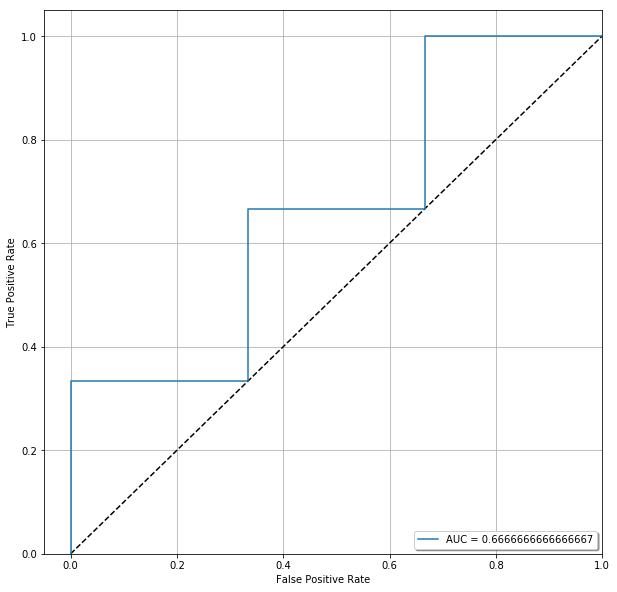

In [337]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [338]:
print(clf_final.oob_score_)

0.6


In [339]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['s_Lactobacillus_animalis',
 's_Lactobacillus_murinus',
 's_Akkermansia_muciniphila',
 's_Parabacteroides_goldsteinii',
 's_Faecalibaculum_rodentium',
 's_Lactobacillus_reuteri',
 's_Lactobacillus_gasseri',
 's_Lactobacillus_acidophilus',
 's_Lactobacillus_amylolyticus',
 's_Lactobacillus_johnsonii',
 's_Bacteroides_vulgatus',
 's_Roseburia_inulinivorans',
 's_Vibrio_sp._2521-89',
 's_Chlamydia_caviae',
 's_Pseudobutyrivibrio_ruminis',
 's_Candidatus_Arthromitus_sp._SFB-mouse',
 's_Lachnospiraceae_bacterium_14-2',
 's_Corynebacterium_uterequi',
 's_Candidatus_Arthromitus_sp._SFB-mouse-NL',
 's_Bifidobacterium_pseudolongum']

In [340]:
for i in feats.values:
    print(i)

0.39845238095238095
0.17690476190476193
0.0863095238095238
0.05309523809523809
0.0475
0.045595238095238105
0.04357142857142857
0.03
0.02571428571428571
0.018452380952380953
0.016666666666666666
0.013333333333333332
0.01
0.01
0.0075000000000000015
0.006666666666666667
0.003571428571428571
0.0033333333333333335
0.003333333333333333
0.0


# T2 LvCoL BA

In [341]:
data = pd.read_csv('T2_BA_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=17)

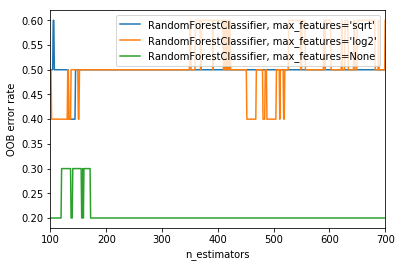

In [331]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 700

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [342]:
clf = RandomForestClassifier(n_estimators=200, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.8


In [350]:
clf_final = RandomForestClassifier(n_estimators=200, max_features=None, oob_score=True, random_state = 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [351]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

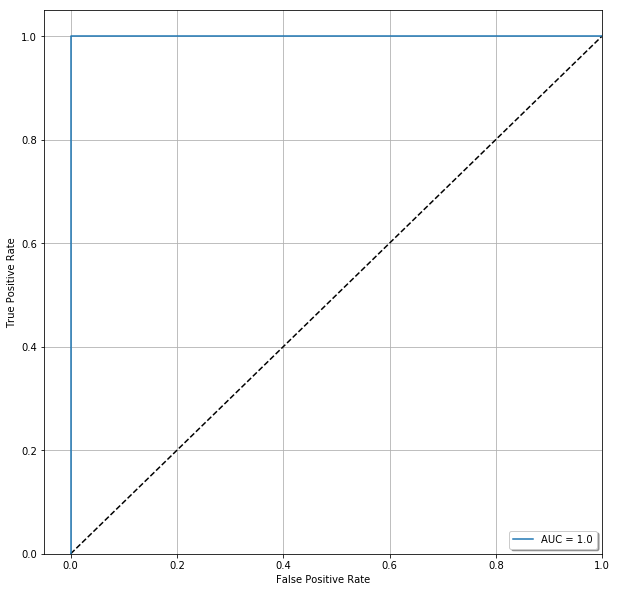

In [352]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [353]:
print(clf_final.oob_score_)

0.8


In [354]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['α-Hyodeoxycholic acid methyl ester .7',
 'α-Hyodeoxycholic acid methyl ester ',
 'β-Hyodeoxycholic acid.11',
 'β-Hyodeoxycholic acid.7',
 'β-Hyodeoxycholic acid.16',
 'β-Hyodeoxycholic acid.14',
 'α-Hyodeoxycholic acid methyl ester .5',
 'β-Hyodeoxycholic acid.10',
 'β-Hyodeoxycholic acid.13',
 'α-Hyodeoxycholic acid methyl ester .1',
 'α-Hyodeoxycholic acid methyl ester .6',
 'β-Hyodeoxycholic acid.6',
 'β-Hyodeoxycholic acid.5',
 'α-Hyodeoxycholic acid methyl ester .3',
 'β-Hyodeoxycholic acid.8',
 'β-Hyodeoxycholic acid.12',
 'β-Hyodeoxycholic acid.18',
 'α-Hyodeoxycholic acid methyl ester .2',
 'α-Hyodeoxycholic acid methyl ester .4',
 'β-Hyodeoxycholic acid.17']

In [355]:
for i in feats.values:
    print(i)

0.4722222222222224
0.17238095238095238
0.10384920634920636
0.08436507936507937
0.060972222222222226
0.043769841269841264
0.020257936507936513
0.011666666666666667
0.011527777777777777
0.007222222222222222
0.004563492063492064
0.0034523809523809524
0.002083333333333333
0.0016666666666666668
0.0
0.0
0.0
0.0
0.0
0.0


# T2 LvCoL Known

In [356]:
data = pd.read_csv('T2_Known_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=17)

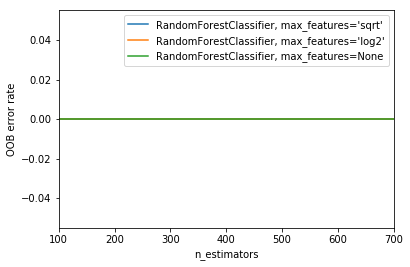

In [357]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 700

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [358]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 1.0


In [359]:
clf_final = RandomForestClassifier(n_estimators=200, max_features=None, oob_score=True, random_state = 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 1.0


In [360]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

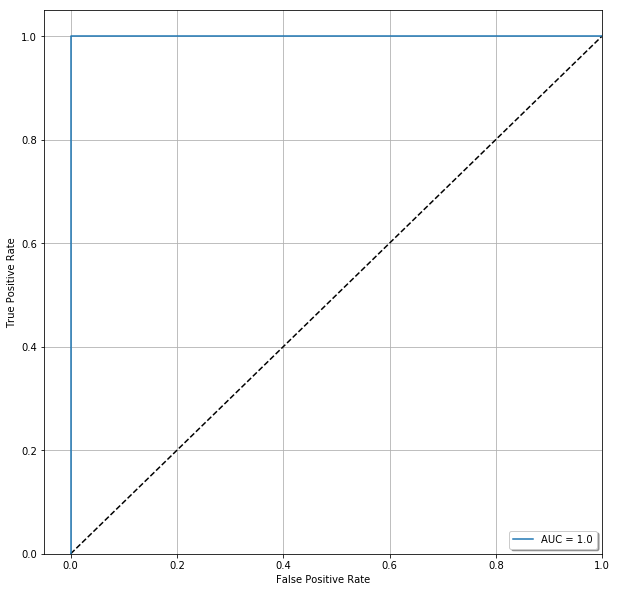

In [361]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [362]:
print(clf_final.oob_score_)

1.0


In [363]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['Oleanolic acid methyl ester',
 'Urobilin',
 'phosphocholine (NIST14)',
 'Urobilin (NIST14)',
 'phosphocholine (NIST14).2',
 'Phytomonic acid',
 'Urobilin (NIST14).2',
 'Oleoyl L-carnitine (NIST14)',
 '4-dihydroxyheptadec-16-en-2-yl acetate',
 'Phenol',
 'Palmitoyl-L-carnitine',
 'Oleic acid methyl ester',
 'Tris(2-butoxyethyl) phosphate (NIST14)',
 'Phe-Pro (NIST14)',
 'PC(0:0/18:0); [M+H]+ C26H55N1O7P1',
 'phosphoethanolamine (NIST14)',
 'phosphocholine (NIST14).1',
 'Oleanolic acid',
 'PC(O-16:1/0:0); [M+H]+ C24H51N1O6P1',
 '9(10)-EpOME (NIST14)']

In [364]:
for i in feats.values:
    print(i)

0.22
0.155
0.155
0.135
0.135
0.12
0.015
0.015
0.01
0.01
0.005
0.005
0.005
0.005
0.005
0.005
0.0
0.0
0.0
0.0
